In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\youssef azam\Desktop\CA\OnlineRetail.csv", encoding='latin1')
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

# Before moving forward towards RFM score calculations we need to proceed with some basic preprocessing steps:
#### Clean the data like Delete all negative Quantity and Price; 
#### Delete NA customer ID; 
#### Handle duplicate null values;
#### Remove unnecessary columns

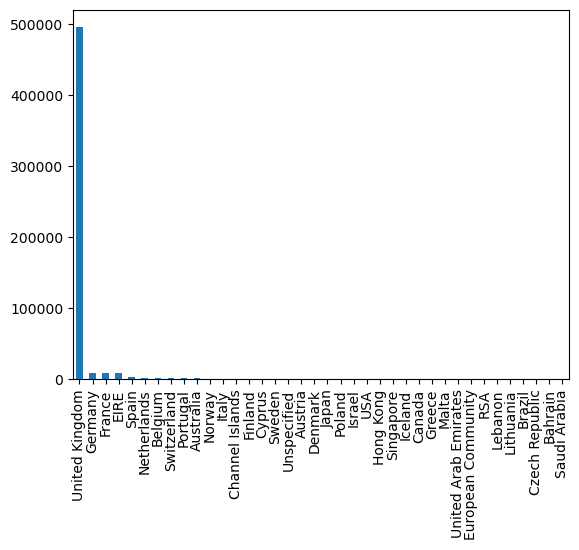

In [5]:
df['Country'].value_counts().plot(kind='bar')
plt.show()

In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [7]:
df.drop(['StockCode','Description','Country'],axis = 1, inplace =True)

In [8]:
df.describe(include='all')

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909,541909.000000,541909,541909.000000,406829.000000
unique,25900,NaN,23260,NaN,NaN
top,573585,NaN,31-10-2011 14:41,NaN,NaN
freq,1114,NaN,1114,NaN,NaN
mean,NaN,9.552250,NaN,4.611114,15287.690570
std,NaN,218.081158,NaN,96.759853,1713.600303
min,NaN,-80995.000000,NaN,-11062.060000,12346.000000
25%,NaN,1.000000,NaN,1.250000,13953.000000
50%,NaN,3.000000,NaN,2.080000,15152.000000
75%,NaN,10.000000,NaN,4.130000,16791.000000


In [9]:
df.isnull().sum()

InvoiceNo           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

In [10]:
#remove null value because the row if don't have a id not important
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [12]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.count()

InvoiceNo      151429
Quantity       151429
InvoiceDate    151429
UnitPrice      151429
CustomerID     151429
dtype: int64

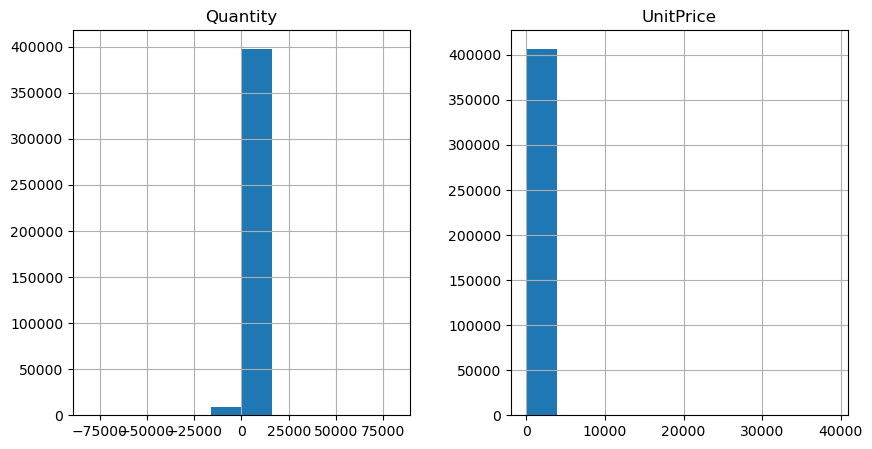

In [13]:
df[['Quantity','UnitPrice']].hist(figsize=(10,5))
plt.show()

In [14]:
# remove outlier 
df=df[df['Quantity']>0]
df=df[df['UnitPrice']>0]

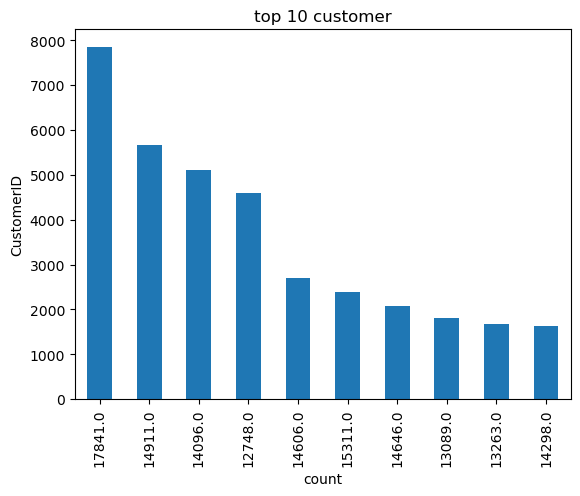

In [15]:
df['CustomerID'].value_counts().head(10).plot(kind='bar')
plt.title('top 10 customer')
plt.xlabel('count')
plt.ylabel('CustomerID')
plt.show()

In [16]:
df['CustomerID'].value_counts()

17841.0    7847
14911.0    5675
14096.0    5111
12748.0    4595
14606.0    2700
           ... 
18184.0       1
13185.0       1
16073.0       1
17948.0       1
17846.0       1
Name: CustomerID, Length: 4338, dtype: int64

In [17]:
un=df['CustomerID'].nunique()
un

4338

In [19]:
!pip install rfm

In [20]:
from rfm import RFM

In [21]:
r=RFM(df,customer_id='CustomerID',transaction_date='InvoiceDate',amount='UnitPrice')

In [23]:
new_df=r.rfm_table
new_df

,CustomerID,recency,frequency,monetary_value,r,f,m,rfm_score,segment
0,16607,0,128,707.96,5,5,5,555,Champions
1,14688,3,246,565.80,5,5,5,555,Champions
2,14591,16,103,276.95,5,5,5,555,Champions
3,17365,13,265,598.92,5,5,5,555,Champions
4,14606,5,1798,5642.88,5,5,5,555,Champions
...,...,...,...,...,...,...,...,...,...
4333,14437,454,3,3.55,1,1,1,111,Lost
4334,14438,191,4,5.70,1,1,1,111,Lost
4335,14457,311,4,5.02,1,1,1,111,Lost
4336,14483,282,7,12.47,1,1,1,111,Lost


In [27]:
new_df['segment'].value_counts()

Champions              969
Loyal Accounts         801
At Risk                655
Lost                   644
About to Sleep         427
Potential Loyalist     361
Low Spenders           344
Promising               63
New Active Accounts     56
Need Attention          18
Name: segment, dtype: int64

# date

# Recency (R)
##  What is a Recency 
### Recency (R) as days since last purchase: How many days ago was their last purchase? Deduct most recent purchase date from today to calculate the recency value.
### ex: when you clauc this if you start data from 1/1/2023 and we did segment today R= last transaction  - today()

In [21]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.date

In [22]:
df['InvoiceDate']

0         2010-01-12
1         2010-01-12
2         2010-01-12
3         2010-01-12
4         2010-01-12
             ...    
541904    2011-09-12
541905    2011-09-12
541906    2011-09-12
541907    2011-09-12
541908    2011-09-12
Name: InvoiceDate, Length: 397884, dtype: object

In [23]:
df['InvoiceDate'].max(),df['InvoiceDate'].min()

(datetime.date(2011, 12, 10), datetime.date(2010, 1, 12))

In [25]:
last_transaction_date = df.groupby('CustomerID')['InvoiceDate'].max()

In [26]:
last_transaction_date

CustomerID
12346.0    2011-01-18
12347.0    2011-10-31
12348.0    2011-09-25
12349.0    2011-11-21
12350.0    2011-02-02
              ...    
18280.0    2011-07-03
18281.0    2011-12-06
18282.0    2011-05-08
18283.0    2011-11-30
18287.0    2011-12-10
Name: InvoiceDate, Length: 4338, dtype: object

In [29]:
import pandas as pd

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

last_transaction_date = df.groupby('CustomerID')['InvoiceDate'].max()

# Set the reference date as 2011-12-10
reference_date = pd.to_datetime('2011-12-10')

last_transaction_date = pd.to_datetime(last_transaction_date)

days_difference = (reference_date - last_transaction_date).dt.days

print(days_difference)


CustomerID
12346.0    326
12347.0     40
12348.0     76
12349.0     19
12350.0    311
          ... 
18280.0    160
18281.0      4
18282.0    216
18283.0     10
18287.0      0
Name: InvoiceDate, Length: 4338, dtype: int64


In [30]:
days_difference.max(),days_difference.min()

(697, 0)

# count of unique customer 4338

# Frequency (F)
### the total number of transactions: How many times has the customer purchased from our store? For example, if someone placed 10 orders over a period of time, their frequency is 10.

In [32]:
import pandas as pd
data = df.groupby('CustomerID').agg({
    'CustomerID': 'count',   # Count the unique InvoiceNo per customer (number of orders)
})

data_frequency = data.rename(columns={'CustomerID': 'OrderCount'})

data_frequency = data_frequency.sort_values(by='OrderCount', ascending=False)

print(data_frequency)


            OrderCount
CustomerID            
17841.0           7847
14911.0           5675
14096.0           5111
12748.0           4595
14606.0           2700
...                ...
17846.0              1
13017.0              1
13099.0              1
13106.0              1
12346.0              1

[4338 rows x 1 columns]


# Monetary (M)
### total money spent: How many $$ (or whatever is your currency of calculation) has this customer spent? Simply total up the money from all transactions to get the M value.



In [33]:
import pandas as pd

data_monetary = df.groupby('CustomerID').agg({
    'UnitPrice': 'sum'        
})

data_monetary = data_monetary.rename(columns={'UnitPrice': 'TotalUnitPrice'})
data_monetary = data_monetary.sort_values(by='TotalUnitPrice', ascending=False)

print(data_monetary)


            TotalUnitPrice
CustomerID                
14096.0           33332.45
14911.0           26185.72
17841.0           19848.49
12744.0           12949.99
12748.0           12205.60
...                    ...
17752.0               0.42
13366.0               0.39
12875.0               0.34
18084.0               0.29
15118.0               0.17

[4338 rows x 1 columns]


In [34]:
# creat dataframe by(data_monetary,days_difference,data_frequency,customer id)

In [47]:
final_data = pd.DataFrame({
    'Recency': days_difference,
    'Frequency': data_frequency['OrderCount'],
    'Monetary': data_monetary['TotalUnitPrice']
})

final_data

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,1.04
12347.0,40,182,481.21
12348.0,76,31,178.71
12349.0,19,73,605.10
12350.0,311,17,65.30
...,...,...,...
18280.0,160,10,47.65
18281.0,4,7,39.36
18282.0,216,12,62.39


In [48]:
final_data.describe(include='all')

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,105.502766,91.720609,285.846154
std,115.089552,228.785094,880.636531
min,0.000000,1.000000,0.170000
25%,22.000000,17.000000,51.725000
50%,61.000000,41.000000,127.290000
75%,161.750000,100.000000,294.452500
max,697.000000,7847.000000,33332.450000


In [49]:
final_data=final_data[final_data['Recency']<400]

In [50]:
final_data=final_data[final_data['Frequency']<600]

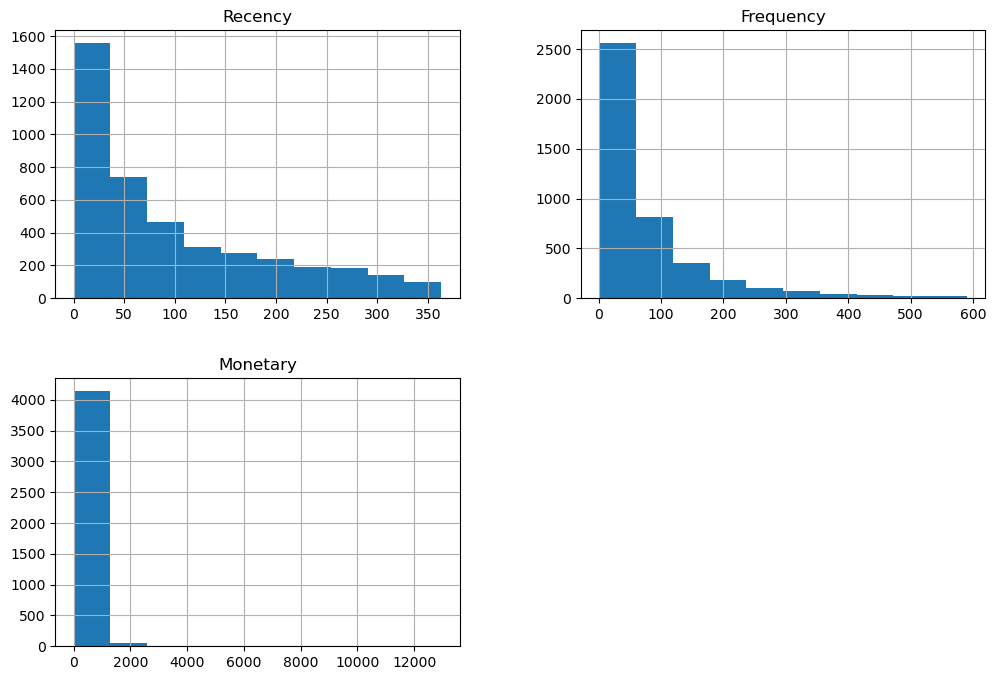

In [51]:
final_data.hist(figsize=(12,8))
plt.show()

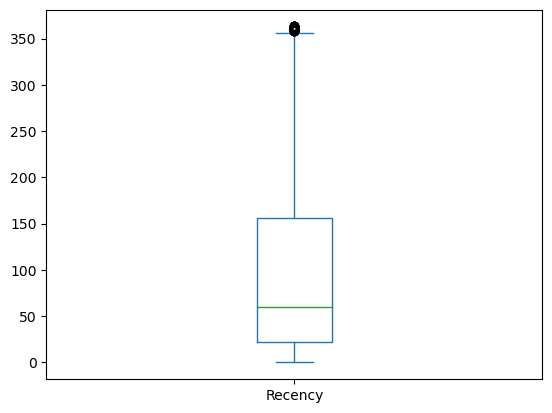

In [55]:
final_data['Recency'].plot(kind='box')
plt.show()

In [57]:
RFM_table=final_data

# Segmention By Quantiles

In [58]:
quantiles = RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,22.0,17.0,52.33
0.50,60.0,41.0,127.43
0.75,156.0,98.0,287.80


In [61]:
# Removing unnecessary line
# quantiles = quantiles.to_dict()

## RFM Segmentation ----
RFM_Segment = RFM_table.copy()

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def R_Class(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FM_Class(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

RFM_Segment['R_Quartile'] = RFM_Segment['Recency'].apply(R_Class, args=('Recency', quantiles,))
RFM_Segment['F_Quartile'] = RFM_Segment['Frequency'].apply(FM_Class, args=('Frequency', quantiles,))
RFM_Segment['M_Quartile'] = RFM_Segment['Monetary'].apply(FM_Class, args=('Monetary', quantiles,))
RFM_Segment['RFMClass'] = RFM_Segment.R_Quartile.map(str) \
                            + RFM_Segment.F_Quartile.map(str) \
                            + RFM_Segment.M_Quartile.map(str)


## RFM segmentation readily answers these questions for your business…

#### Who are my best customers?
#### Which customers are at the verge of churning?
#### Who are lost customers that you don’t need to pay much attention to?
#### Who are your loyal customers?
#### Which customers you must retain?
#### Who has the potential to be converted into more profitable customers?
#### Which group of customers is most likely to respond to your current campaign?

## '1' Who are my best customers?

In [63]:
#RFMClass = 444
RFM_Segment[RFM_Segment['RFMClass']=='444'].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
12757.0,5,371,4419.59,4,4,4,444
15502.0,16,213,4193.96,4,4,4,444
14088.0,11,589,3375.38,4,4,4,444
14180.0,11,240,2234.69,4,4,4,444
18109.0,4,444,2189.03,4,4,4,444
12359.0,9,248,2137.86,4,4,4,444
15044.0,6,453,2098.69,4,4,4,444
12471.0,11,460,1978.17,4,4,4,444
12682.0,2,525,1968.83,4,4,4,444


## '2'  Which customers are at the verge of churning?



In [64]:
#Customers who's recency value is low

RFM_Segment[RFM_Segment['R_Quartile'] <= 2 ].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
17846.0,86,1,2033.10,2,1,4,214
13097.0,78,423,1795.26,2,4,4,244
17107.0,76,418,1397.63,2,4,4,244
17581.0,66,440,1371.88,2,4,4,244
12352.0,73,85,1354.11,2,3,4,234
14936.0,98,364,1339.19,2,4,4,244
15493.0,150,297,1319.29,2,4,4,244
15098.0,65,3,1303.95,2,1,4,214
15998.0,88,506,1291.79,2,4,4,244


## Q. Who are the lost customers?

In [66]:
#Customers who's recency, frequency as well as monetary values are low 

RFM_Segment[RFM_Segment['RFMClass']=='111'].sort_values('Recency',ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
16665.0,363,9,48.50,1,1,1,111
17524.0,362,6,9.55,1,1,1,111
15361.0,362,7,9.41,1,1,1,111
13948.0,361,3,11.85,1,1,1,111
17752.0,360,1,0.42,1,1,1,111
13295.0,360,10,34.90,1,1,1,111
18050.0,360,5,11.55,1,1,1,111
17496.0,359,10,51.65,1,1,1,111
15224.0,359,14,44.99,1,1,1,111


## Who are loyal customers?

In [68]:
#Customers with high frequency value

RFM_Segment[RFM_Segment['F_Quartile'] >= 3 ].sort_values('Monetary', ascending=False).head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMClass
CustomerID,,,,,,,
12744.0,52,222,12949.99,3,4,4,344
12536.0,30,261,9070.93,3,4,4,344
16029.0,30,242,8722.39,3,4,4,344
12757.0,5,371,4419.59,4,4,4,444
15502.0,16,213,4193.96,4,4,4,444
14088.0,11,589,3375.38,4,4,4,444
15581.0,32,149,3360.20,3,4,4,344
14180.0,11,240,2234.69,4,4,4,444
18109.0,4,444,2189.03,4,4,4,444


# Segmentation using unsupervised learning, particularly K-means clustering

In [28]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans
# import matplotlib.pyplot as plt

# # Load or create the 'final_data' DataFrame
# final_data = final_data

# # Standardize the data
# scaler = StandardScaler()
# rfm_scaled = scaler.fit_transform(final_data)

# inertia = []
# for k in range(1, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(rfm_scaled)
#     inertia.append(kmeans.inertia_)

# plt.figure(figsize=(8, 6))
# plt.plot(range(1, 11), inertia, marker='o')
# plt.xlabel('Num of Clusters (K)')
# plt.show()

# # Choose the optimal K value based on the Elbow Method plot
# k = 4

# # Apply K-means clustering with the chosen K value for each RFM column
# cluster_models = {}
# for col in range(rfm_scaled.shape[1]):
#     column_data = rfm_scaled[:, col].reshape(-1, 1)
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     clusters = kmeans.fit_predict(column_data)
#     cluster_models[col] = kmeans
#     final_data[f'Cluster_{col}'] = clusters

# # Compute the overall cluster labels
# overall_clusters = [tuple(clusters) for clusters in zip(*[final_data[f'Cluster_{col}'] for col in range(rfm_scaled.shape[1])])]

# # Create a copy of the dataframe to preserve the original data
# final_data_with_clusters = final_data.copy()

# # Add the overall cluster labels as a new column
# final_data_with_clusters['Overall_Cluster'] = overall_clusters

# # Rename the cluster columns
# for col in range(rfm_scaled.shape[1]):
#     final_data_with_clusters.rename(columns={f'Cluster_{col}': f'cluster_R{col}'}, inplace=True)

# # Print the counts of each cluster for each RFM column
# for col in range(rfm_scaled.shape[1]):
#     print(f'Cluster counts for column {col}:')
#     print(final_data_with_clusters[f'cluster_R{col}'].value_counts())
#     print()


In [89]:
final_data_with_clusters.rename(columns={
    'cluster_R0': 'Recency_cluster',
    'cluster_R1': 'Frequency_cluster',
    'cluster_R2': 'Monetary_cluster'
}, inplace=True)

In [90]:
final_data_with_clusters

,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetary_cluster,Overall_Cluster
CustomerID,,,,,,,
12346.0,326,1,1.04,2,0,0,"(2, 0, 0)"
12347.0,40,182,481.21,3,1,2,"(3, 1, 2)"
12348.0,76,31,178.71,0,0,0,"(0, 0, 0)"
12349.0,19,73,605.10,3,2,2,"(3, 2, 2)"
12350.0,311,17,65.30,2,0,0,"(2, 0, 0)"
...,...,...,...,...,...,...,...
18278.0,74,9,29.55,0,0,0,"(0, 0, 0)"
18280.0,160,10,47.65,1,0,0,"(1, 0, 0)"
18281.0,4,7,39.36,3,0,0,"(3, 0, 0)"


In [91]:
final_data_with_clusters['RFM_Score'] = final_data_with_clusters['Recency_cluster'].astype(str) + final_data_with_clusters['Frequency_cluster'].astype(str) + final_data_with_clusters['Monetary_cluster'].astype(str)

In [92]:
final_data_with_clusters

,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetary_cluster,Overall_Cluster,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,1.04,2,0,0,"(2, 0, 0)",200
12347.0,40,182,481.21,3,1,2,"(3, 1, 2)",312
12348.0,76,31,178.71,0,0,0,"(0, 0, 0)",000
12349.0,19,73,605.10,3,2,2,"(3, 2, 2)",322
12350.0,311,17,65.30,2,0,0,"(2, 0, 0)",200
...,...,...,...,...,...,...,...,...
18278.0,74,9,29.55,0,0,0,"(0, 0, 0)",000
18280.0,160,10,47.65,1,0,0,"(1, 0, 0)",100
18281.0,4,7,39.36,3,0,0,"(3, 0, 0)",300


In [93]:
final_data_with_clusters['RFM_Score'].value_counts()

300    945
000    676
100    528
200    516
320    361
322    267
312    229
020    132
331     96
022     95
120     60
311     50
012     46
122     42
220     30
332     29
302     15
031     12
310     11
112     11
202      8
222      6
002      6
321      6
011      5
212      4
102      4
313      3
010      3
032      2
001      2
121      1
021      1
111      1
301      1
232      1
Name: RFM_Score, dtype: int64

In [94]:
import pandas as pd

# Create a dictionary mapping the RFM scores to segment names
seg_map = {
    '300': 'champions',
    '000': 'cant_loose',
    '100': 'about_to_sleep',
    '200': 'potential_loyalists',
    '320': 'loyal_customers',
    '322': 'need_attention',
    '312': 'promising',
    '020': 'at_Risk',
    '331': 'perfect',
    '022': 'hibernating',
    '120': 'new_customers',
    '311': 'promiseing',
    '012': 'about_to_sleep',
    '122': 'potential_loyalists',
    '220': 'cant_loose',
    '332': 'perfect',
    '302': 'at_Risk',
    '031': 'hibernating',
    '310': 'promiseing',
    '112': 'new_customers',
    '202': 'potential_loyalists',
    '222': 'perfect',
    '002': 'about_to_sleep',
    '321': 'cant_loose',
    '011': 'promiseing',
    '212': 'potential_loyalists',
    '102': 'about_to_sleep',
    '313': 'at_Risk',
    '010': 'perfect',
    '032': 'hibernating',
    '001': 'perfect',
    '121': 'about_to_sleep',
    '021': 'cant_loose',
    '111': 'promiseing',
    '301': 'perfect',
    '232': 'potential_loyalists'
}

final_data_with_clusters['segment'] = final_data_with_clusters['RFM_Score'].replace(seg_map, regex=True)
final_data_with_clusters.head()

,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetary_cluster,Overall_Cluster,RFM_Score,segment
CustomerID,,,,,,,,,
12346.0,326,1,1.04,2,0,0,"(2, 0, 0)",200,potential_loyalists
12347.0,40,182,481.21,3,1,2,"(3, 1, 2)",312,promising
12348.0,76,31,178.71,0,0,0,"(0, 0, 0)",000,cant_loose
12349.0,19,73,605.10,3,2,2,"(3, 2, 2)",322,need_attention
12350.0,311,17,65.30,2,0,0,"(2, 0, 0)",200,potential_loyalists


In [95]:
final_data_with_clusters

,Recency,Frequency,Monetary,Recency_cluster,Frequency_cluster,Monetary_cluster,Overall_Cluster,RFM_Score,segment
CustomerID,,,,,,,,,
12346.0,326,1,1.04,2,0,0,"(2, 0, 0)",200,potential_loyalists
12347.0,40,182,481.21,3,1,2,"(3, 1, 2)",312,promising
12348.0,76,31,178.71,0,0,0,"(0, 0, 0)",000,cant_loose
12349.0,19,73,605.10,3,2,2,"(3, 2, 2)",322,need_attention
12350.0,311,17,65.30,2,0,0,"(2, 0, 0)",200,potential_loyalists
...,...,...,...,...,...,...,...,...,...
18278.0,74,9,29.55,0,0,0,"(0, 0, 0)",000,cant_loose
18280.0,160,10,47.65,1,0,0,"(1, 0, 0)",100,about_to_sleep
18281.0,4,7,39.36,3,0,0,"(3, 0, 0)",300,champions


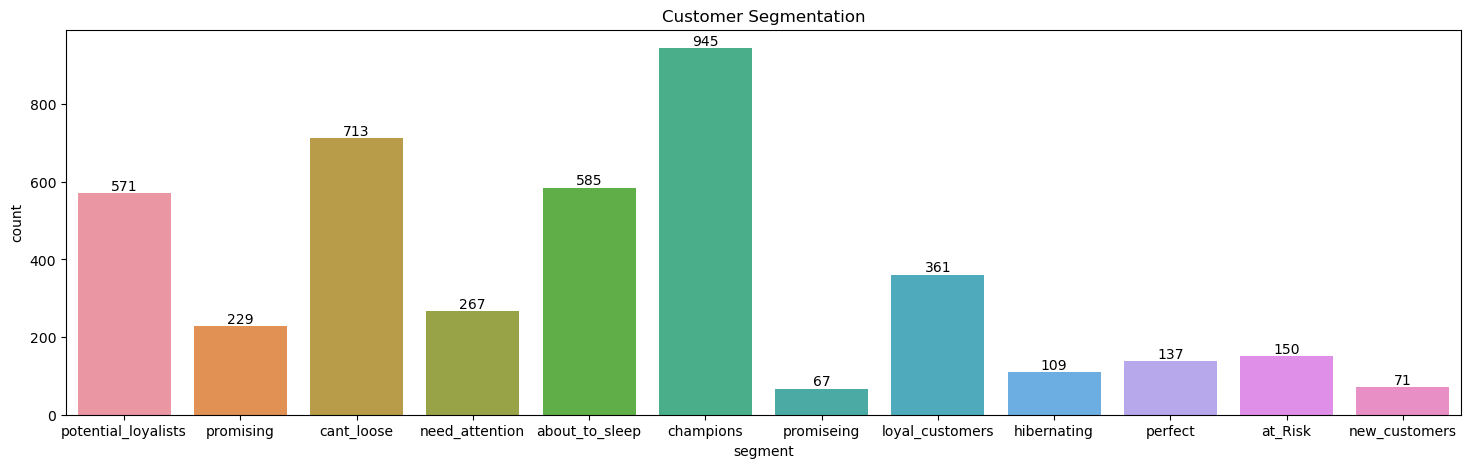

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))
ax = sns.countplot(x='segment', data=final_data_with_clusters)
plt.title('Customer Segmentation')

# Add count labels above the columns
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()